In [1]:
import numpy as np

from models import Mw
from funcs import plot_policyfunc, plot_valuefunc, value_it_fixedComp, value_it_stratComp ,plot_price_dev,plot_share_dev, simulate_mw_bertrand
from scipy.interpolate import interp1d #functional interpolation


## Fixed price of 1

Compare being strategic, vs setting price = 1

In [2]:
### infinite horizon setup

# problem setup
n_points = 400
Beta = 0.95
s_list = [ (1/(n_points))*(i+1) for i in range(0,n_points-1)]  #values for weights
p_list = [ (1/(n_points))*(i) for i in range(0,n_points+1)] #values for prices - allows the boundaries
#setup parameters for policy function
outside_price = 1
def outside_policy(x):
    return outside_price

converged successfully in 184 iterations
max value: 20.0


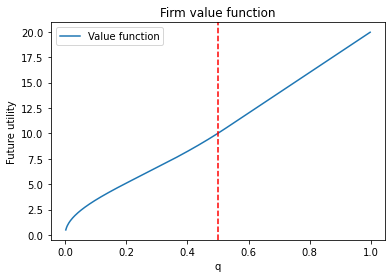

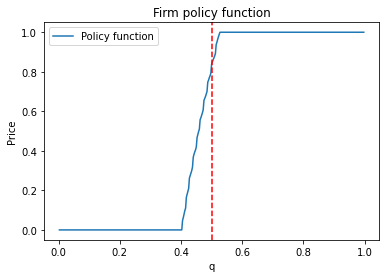

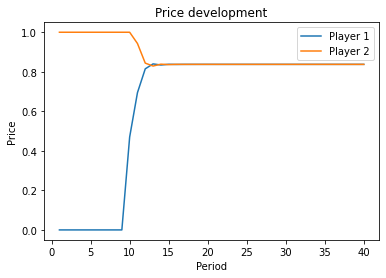

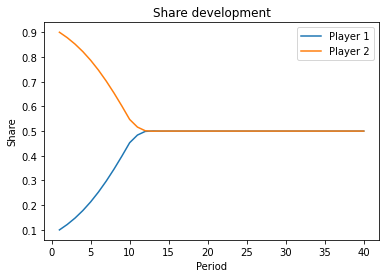

In [5]:
### fixed outside price - best response

#compute (and plot) policy function
res = value_it_fixedComp(s_list,p_list,
                         beta=Beta,
                         outsidePolicy=outside_price)

print('max value: ' + str(round(1/(1-Beta),2)))


plot_valuefunc(s_list,res['value_function'])

plot_policyfunc(s_list,res['policy_function'])

interp_policy_function = interp1d(s_list,
                         res['policy_function'],
                         kind='linear', fill_value='extrapolate')


### simulate
transcript = simulate_mw_bertrand(policy_function1=interp_policy_function,
                                  policy_function2=outside_policy)

plot_price_dev(transcript['time'],transcript['price1'],transcript['price2'])
plot_share_dev(transcript['time'],transcript['share1'],transcript['share2'])

Suppose players both think they are playing against someone who will always set price to 1.

More compeitition in this case!

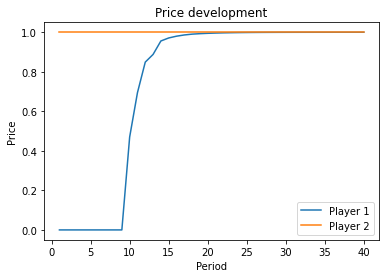

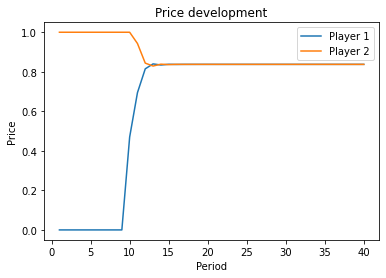

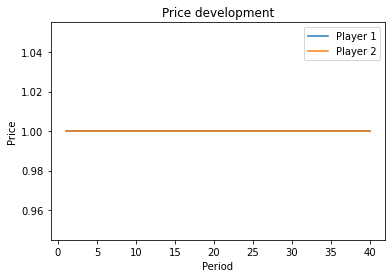

In [11]:
transcript = simulate_mw_bertrand(policy_function1=interp_policy_function,
                                  policy_function2=outside_policy)
plot_price_dev(transcript['time'],transcript['price1'],transcript['price2'])


transcript = simulate_mw_bertrand(policy_function1=interp_policy_function,
                                  policy_function2=interp_policy_function)
plot_price_dev(transcript['time'],transcript['price1'],transcript['price2'])


transcript = simulate_mw_bertrand(policy_function1=outside_policy,
                                  policy_function2=outside_policy)
plot_price_dev(transcript['time'],transcript['price1'],transcript['price2'])

## Strategic setting

converged successfully in 178 iterations
max value: 20.0


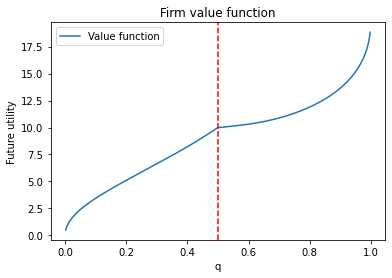

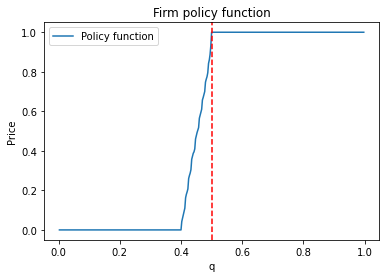

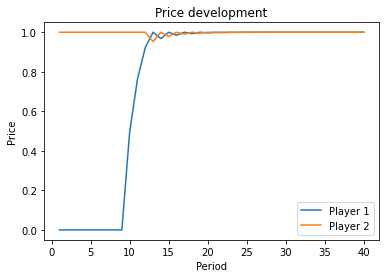

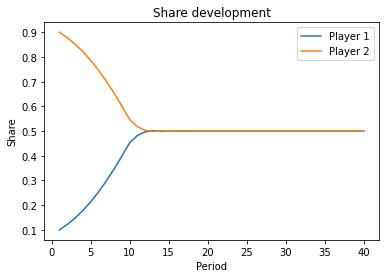

In [4]:
res_strat = value_it_stratComp(s_list,p_list,
                         beta=Beta,
                         max_iterations=2000)

print('max value: ' + str(round(1/(1-Beta),2)))

plot_valuefunc(s_list,res_strat['value_function'])

plot_policyfunc(s_list,res_strat['policy_function'])


interp_policy_function = interp1d(s_list,
                         res_strat['policy_function'],
                         kind='linear', fill_value='extrapolate')


transcript = simulate_mw_bertrand(policy_function1=interp_policy_function,
                                  policy_function2=interp_policy_function)

                                  
plot_price_dev(transcript['time'],transcript['price1'],transcript['price2'])
plot_share_dev(transcript['time'],transcript['share1'],transcript['share2'])